# PREDICTIVE MODELLING LOGISTIC REGRESSION MACHINE LEARNING

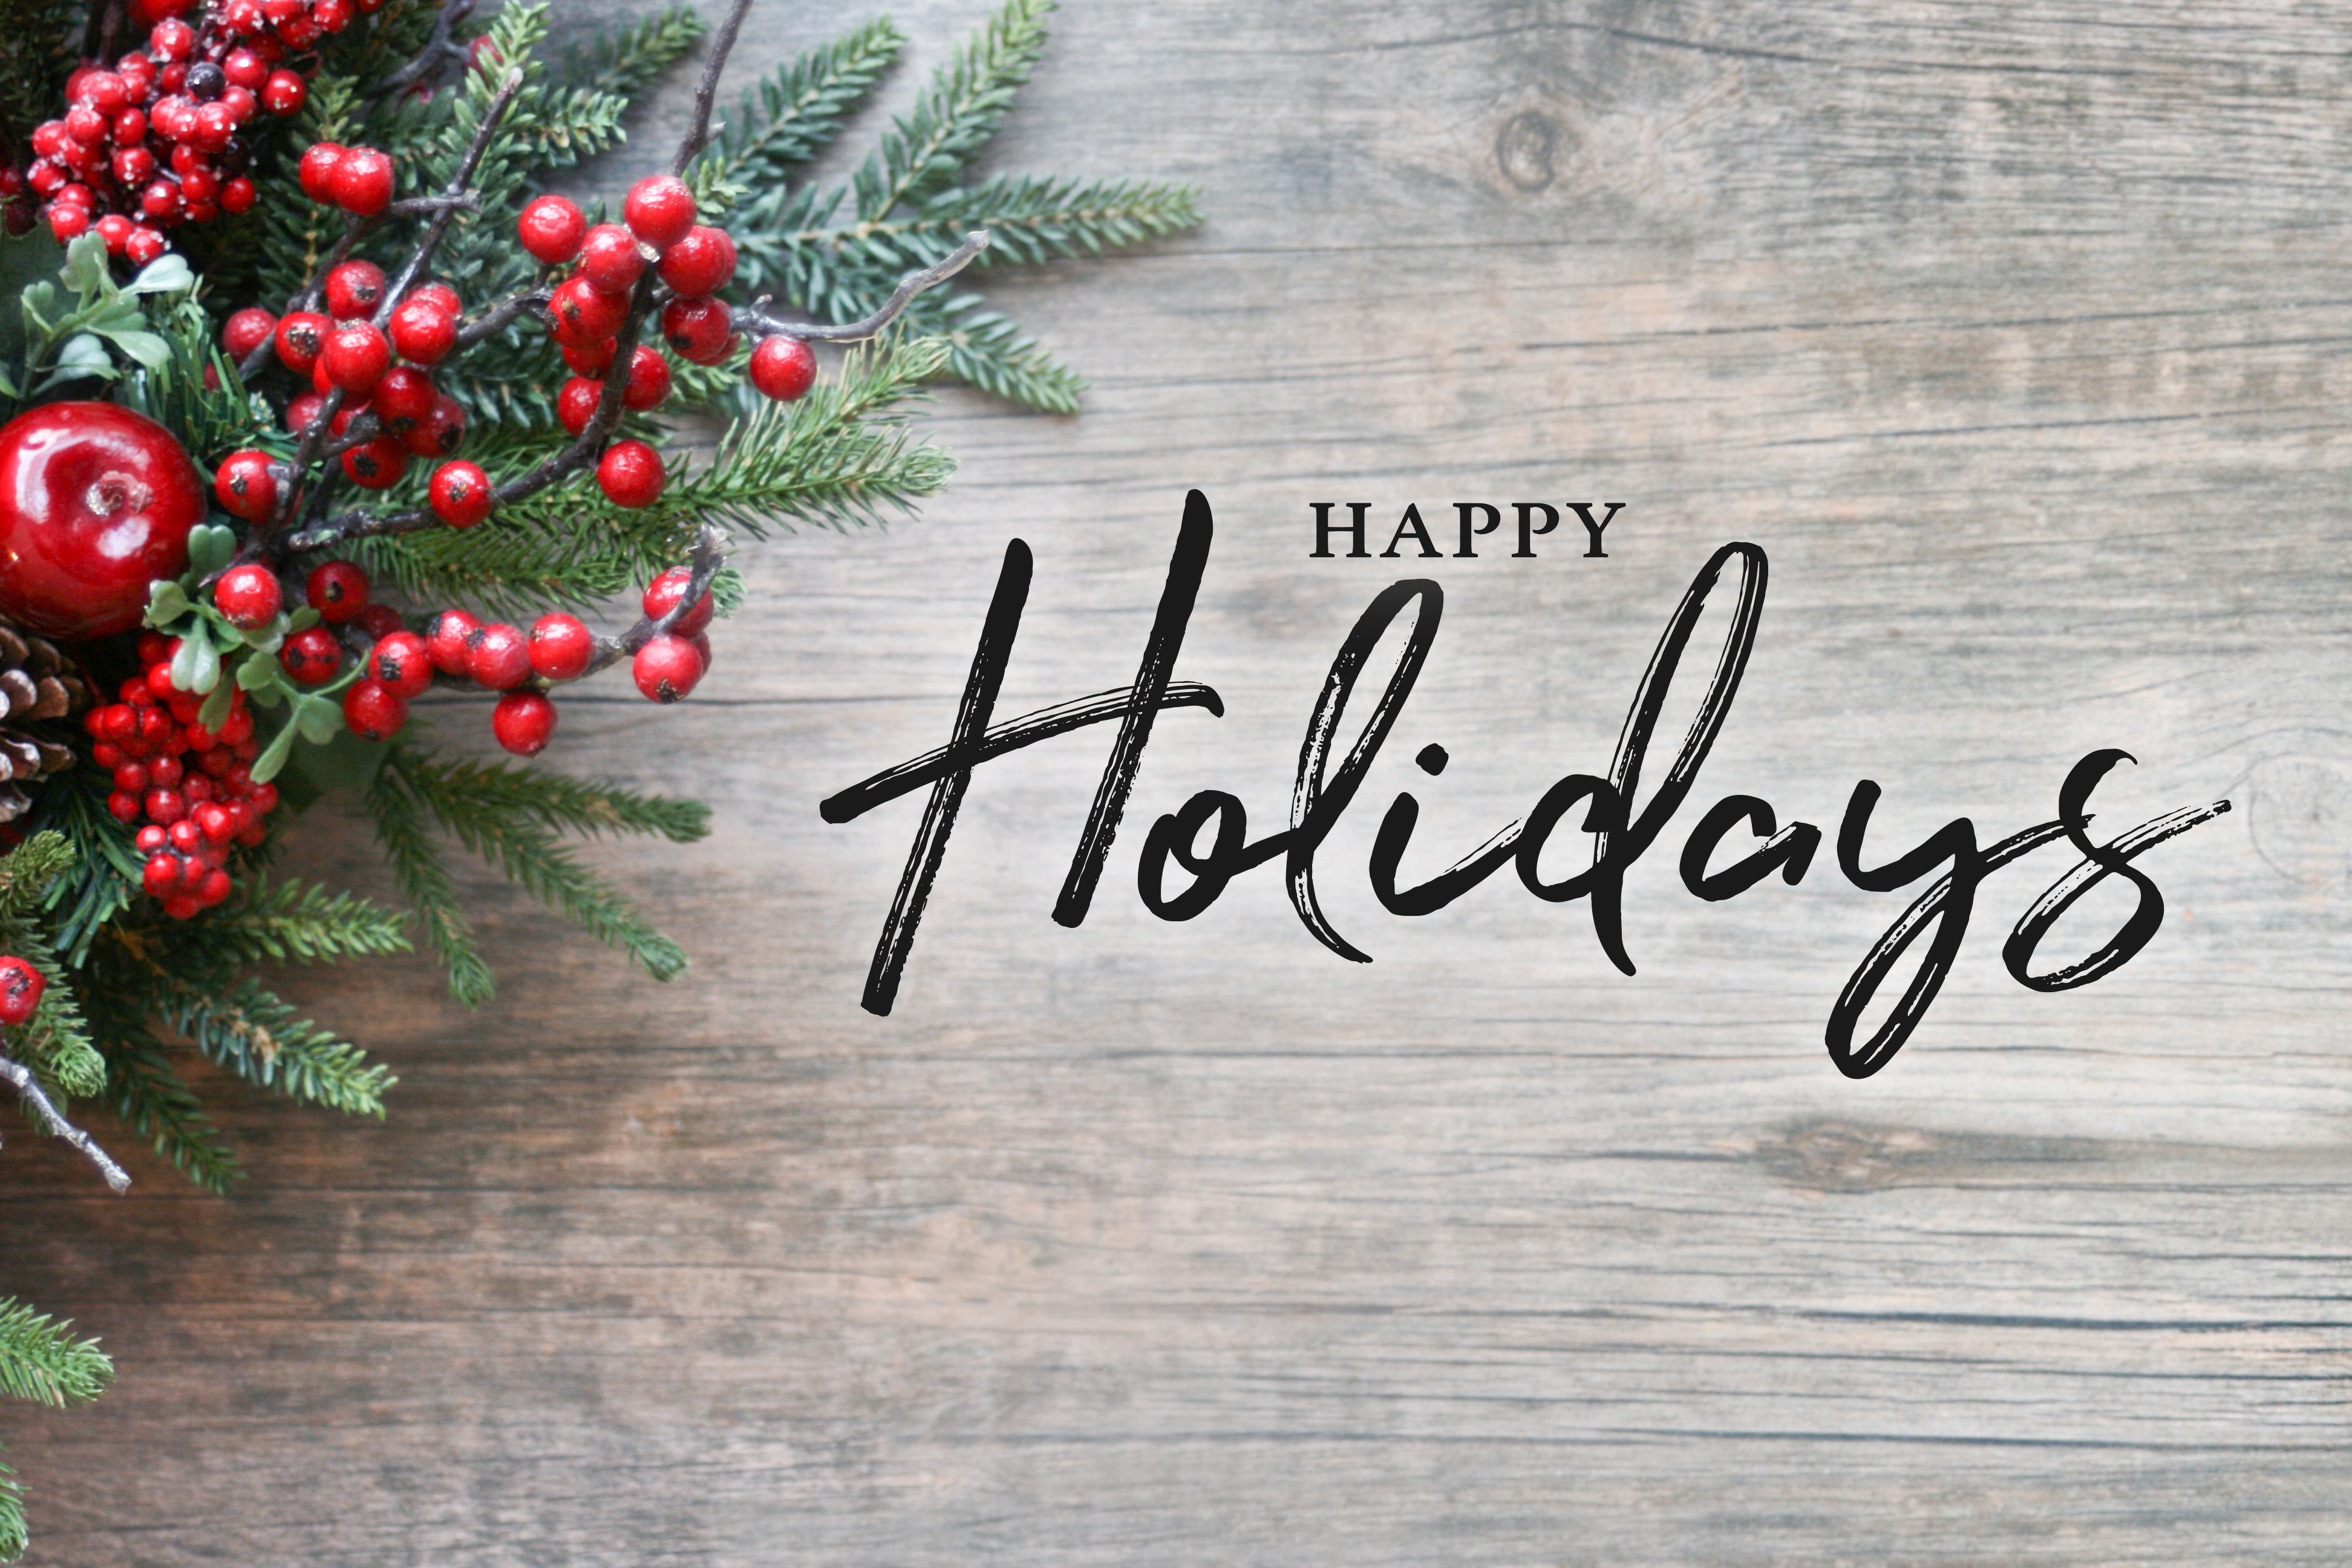

## Problem 2: Logistic Regression

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

| Variables        | Type           | Description  |
| ------------- |:-------------:| -----:|
| Holiday_Package      | Categorical | Yes or No |
| Salary       | Numeric      |   Employee salary |
| age  | Numeric     |    Age in years |
| edu  | Numeric  | Years of formal education|
| no_young_children  | Numeric |  The number of young children (younger than 7 years)|
| no_older_children  | Numeric | Number of older children|
| foreign  | Categorical | foreigner Yes/No|

In [243]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.regression.linear_model as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as sm

In [244]:
plt.rcParams['font.size']=16
plt.rcParams['axes.grid']=True
plt.rcParams['figure.figsize'] = (5,5)
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 100)#show us 100 rows 

In [245]:
holiday_data = pd.read_csv('Holiday_Package.csv')
holiday_data.head()

Unnamed: 0 Holiday_Package  Salary  age  educ  no_young_children  \
0           1              no   48412   30     8                  1   
1           2             yes   37207   45     8                  0   
2           3              no   58022   46     9                  0   
3           4              no   66503   31    11                  2   
4           5              no   66734   44    12                  0   

   no_older_children foreign  
0                  1      no  
1                  1      no  
2                  0      no  
3                  0      no  
4                  2      no

In [246]:
holiday_data.shape

(872, 8)

In [247]:
# Lets drop the Unnamed column as it has not use in the further analysis
holiday_data.drop('Unnamed: 0', axis=1, inplace=True)

In [248]:
# We will build another model with outlier treatment hence making a copy of the df.
HF_OT=holiday_data.copy()
#refer down for the treated model.

### Basic Exploratory Data Analysis

### Check for duplicate data across columns and drop those

In [249]:
dups = holiday_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(holiday_data.shape)

Number of duplicate rows = 0
(872, 7)


### Check for missing values and impute the missing values, if any is present.

In [250]:
holiday_data.isna().sum()

Holiday_Package      0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

### Check the data types of all the variables and get the unique counts of all the 'Object' type variables.

In [251]:
for feature in holiday_data.columns: 
    if holiday_data[feature].dtype == 'object': 
        print(feature)
        print(holiday_data[feature].value_counts())
        print('\n')

Holiday_Package
no     471
yes    401
Name: Holiday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




### Check for the basic measures of descriptive statistics.

In [252]:
holiday_data.describe(include='all')

Holiday_Package         Salary         age        educ  \
count              872     872.000000  872.000000  872.000000   
unique               2            NaN         NaN         NaN   
top                 no            NaN         NaN         NaN   
freq               471            NaN         NaN         NaN   
mean               NaN   47729.172018   39.955275    9.307339   
std                NaN   23418.668531   10.551675    3.036259   
min                NaN    1322.000000   20.000000    1.000000   
25%                NaN   35324.000000   32.000000    8.000000   
50%                NaN   41903.500000   39.000000    9.000000   
75%                NaN   53469.500000   48.000000   12.000000   
max                NaN  236961.000000   62.000000   21.000000   

        no_young_children  no_older_children foreign  
count          872.000000         872.000000     872  
unique                NaN                NaN       2  
top                   NaN                NaN      no  
freq                  NaN                NaN     656  
mean             0.311927           0.982798     NaN  
std              0.612870           1.086786     NaN  
min              0.000000           0.000000     NaN  
25%              0.000000           0.000000     NaN  
50%              0.000000           1.000000     NaN  
75%              0.000000           2.000000     NaN  
max              3.000000           6.000000     NaN

In [253]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holiday_Package    872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


### Checking unique value of categorical data

#### Analyzing the count plot for Discrete Categorical Variable

Categories present in Holiday_Package-


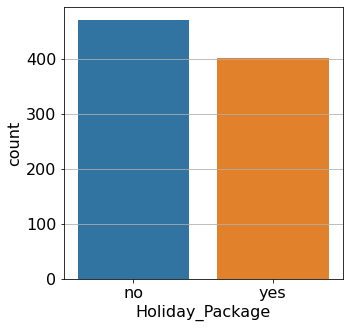

Categories present in foreign-


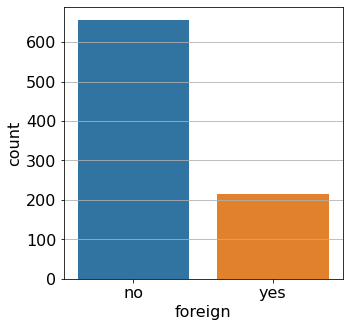

In [254]:
# for column in holiday_data.select_dtypes(include='object'):
#     if holiday_data[column].nunique() < 10:
#         sns.countplot(y=column, data=holiday_data)
#         plt.show()

for i in holiday_data.columns:
    if type(holiday_data[i][0])== str:
        
        print('Categories present in {}-'.format(i))
        sns.countplot(holiday_data[i])
        plt.show()

#### Visualizing the spread of the Numerical data using distplot and boxplot

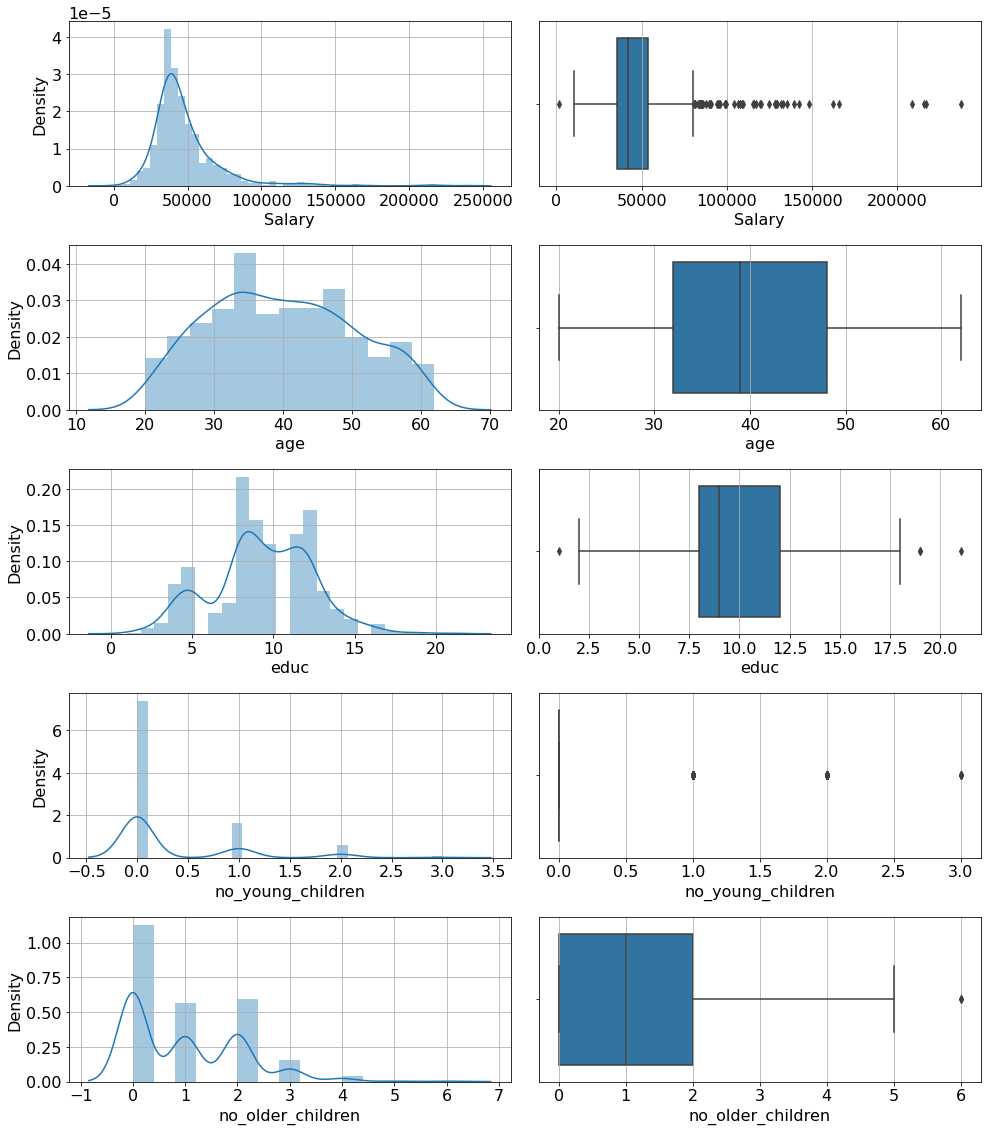

In [255]:
fig, axes= plt.subplots(nrows=5, ncols=2)
fig.set_size_inches(14,16)
j=0
for i in holiday_data.select_dtypes(include='number',exclude='object').columns:
    a=sns.distplot(holiday_data[i],ax=axes[j][0])
    a=sns.boxplot(holiday_data[i],orient='h',ax=axes[j][1])
    j=j+1
    
fig.tight_layout(w_pad=1.0)
plt.show()


#### Let us find the Percentage of Outliers present in each column-

In [256]:
Q1 = holiday_data.quantile(0.25)
Q3 = holiday_data.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((holiday_data < (Q1 - 1.5 * IQR)) | (holiday_data > (Q3 + 1.5 * IQR))).sum()/holiday_data.shape[0]*100),columns =['Outlier %'],index=None).round(2)

Outlier %
Holiday_Package         0.00
Salary                  6.54
age                     0.00
educ                    0.46
foreign                 0.00
no_older_children       0.23
no_young_children      23.74

In [257]:
pd.DataFrame(data=[holiday_data.kurtosis(),holiday_data.skew()],index=['Kurtosis','Skewness']).T.round(2)

Kurtosis  Skewness
Salary                15.85      3.10
age                   -0.91      0.15
educ                   0.01     -0.05
no_young_children      3.11      1.95
no_older_children      0.68      0.95

### Bi-variate Analysis-

### For the Bi-variate Analysis of Target vs continous variables, we shall use Box Plots.

Boxplot of Target Variable vs Salary -


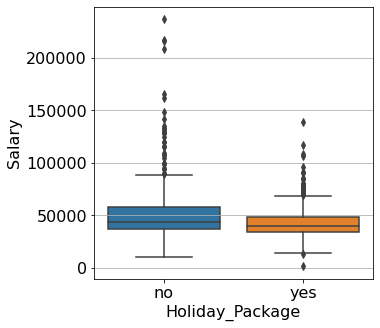

Boxplot of Target Variable vs age -


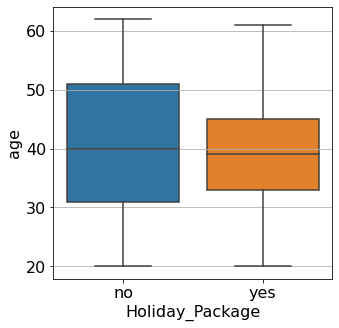

Boxplot of Target Variable vs educ -


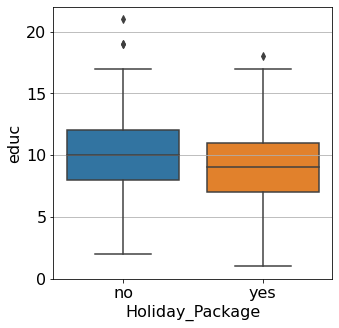

Boxplot of Target Variable vs no_young_children -


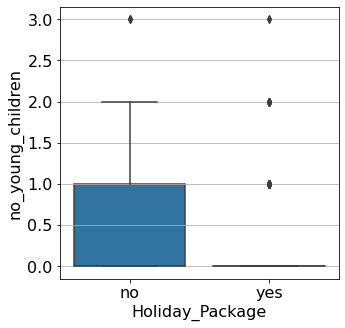

Boxplot of Target Variable vs no_older_children -


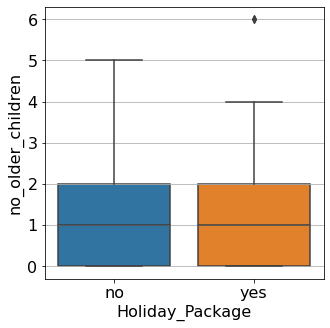

In [258]:
# for column in holiday_data.select_dtypes(include='object'):
#      if holiday_data[column].nunique() < 10:
#             sns.boxplot(y=column, x='Salary', data=holiday_data)
#             plt.show()


for i in holiday_data.columns:
    if type(holiday_data[i][0]) != str:
        
        print('Boxplot of Target Variable vs {} -'.format(i))
        sns.boxplot(x=holiday_data['Holiday_Package'],y=holiday_data[i])
        plt.show()

Boxplot of Target Variable vs Salary -


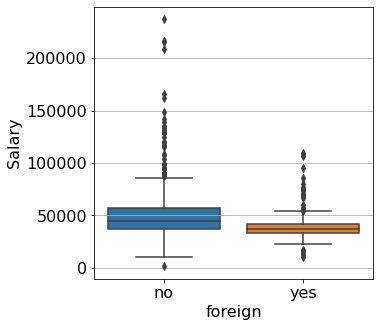

Boxplot of Target Variable vs age -


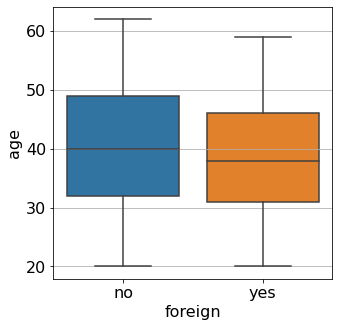

Boxplot of Target Variable vs educ -


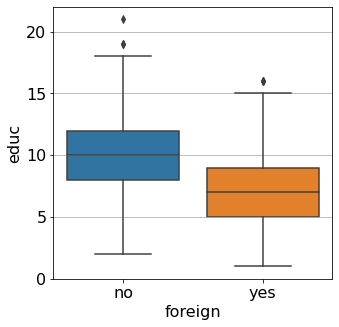

Boxplot of Target Variable vs no_young_children -


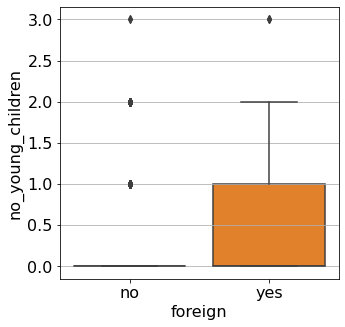

Boxplot of Target Variable vs no_older_children -


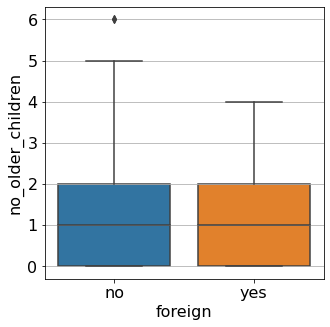

In [259]:
for i in holiday_data.columns:
    if type(holiday_data[i][0]) != str:
        
        print('Boxplot of Target Variable vs {} -'.format(i))
        sns.boxplot(x=holiday_data['foreign'],y=holiday_data[i])
        plt.show()

In [260]:
for column in holiday_data.select_dtypes(include='object'):
    if holiday_data[column].nunique() < 10:
        display(holiday_data.groupby(column).mean())

Salary        age      educ  no_young_children  \
Holiday_Package                                                         
no               51739.443737  40.853503  9.594480           0.409766   
yes              43018.852868  38.900249  8.970075           0.197007   

                 no_older_children  
Holiday_Package                     
no                        0.902335  
yes                       1.077307

Salary        age       educ  no_young_children  \
foreign                                                          
no       50429.248476  40.603659  10.038110           0.282012   
yes      39528.939815  37.986111   7.087963           0.402778   

         no_older_children  
foreign                     
no                0.969512  
yes               1.023148

#### For analyzing relationship between categorical variables and target variables we shall use countplots with target variables as hue elements

Count of Holiday_Package with Hue as Target Variable -


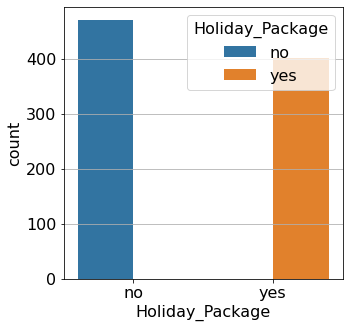

Count of Salary with Hue as Target Variable -


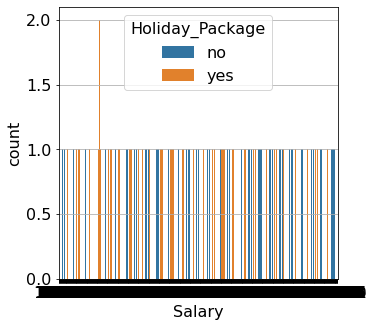

Count of age with Hue as Target Variable -


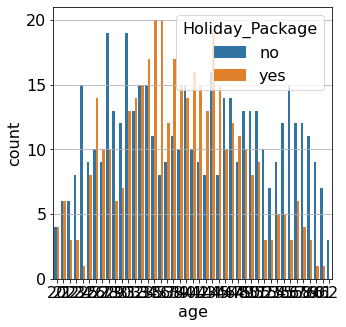

Count of educ with Hue as Target Variable -


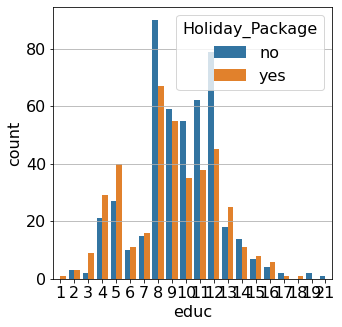

Count of no_young_children with Hue as Target Variable -


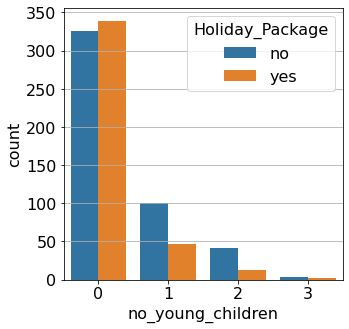

Count of no_older_children with Hue as Target Variable -


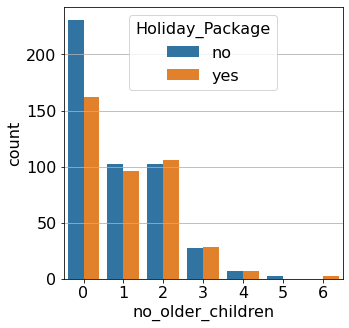

Count of foreign with Hue as Target Variable -


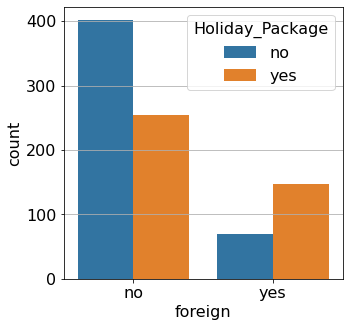

In [261]:
for i in holiday_data.columns:
    if type(holiday_data[i][0] != str and i!='Holiday_Package'):
        
        print('Count of {} with Hue as Target Variable -'.format(i))
        sns.countplot(hue=holiday_data['Holiday_Package'],x=holiday_data[i],)
        plt.show()

In [262]:
# for column in holiday_data.select_dtypes(include='object'):
#      if holiday_data[column].nunique() < 10:
#             sns.boxplot(y=column, x='age', data=holiday_data)
#             plt.show()

In [263]:
# for column in holiday_data.select_dtypes(include='object'):
#      if holiday_data[column].nunique() < 10:
#             sns.boxplot(y=column, x='educ', data=holiday_data)
#             plt.show()

In [264]:
# for column in holiday_data.select_dtypes(include='object'):
#      if holiday_data[column].nunique() < 10:
#             sns.boxplot(y=column, x='no_young_children', data=holiday_data)
#             plt.show()

In [265]:
# for column in holiday_data.select_dtypes(include='object'):
#      if holiday_data[column].nunique() < 10:
#             sns.boxplot(y=column, x='no_older_children', data=holiday_data)
#             plt.show()

## Checking for Correlations. Print the correlation matrix and the correlation heatmap.

In [266]:
corr=holiday_data.corr()
corr

Salary       age      educ  no_young_children  \
Salary             1.000000  0.071709  0.326540          -0.029664   
age                0.071709  1.000000 -0.149294          -0.519093   
educ               0.326540 -0.149294  1.000000           0.098350   
no_young_children -0.029664 -0.519093  0.098350           1.000000   
no_older_children  0.113772 -0.116205 -0.036321          -0.238428   

                   no_older_children  
Salary                      0.113772  
age                        -0.116205  
educ                       -0.036321  
no_young_children          -0.238428  
no_older_children           1.000000

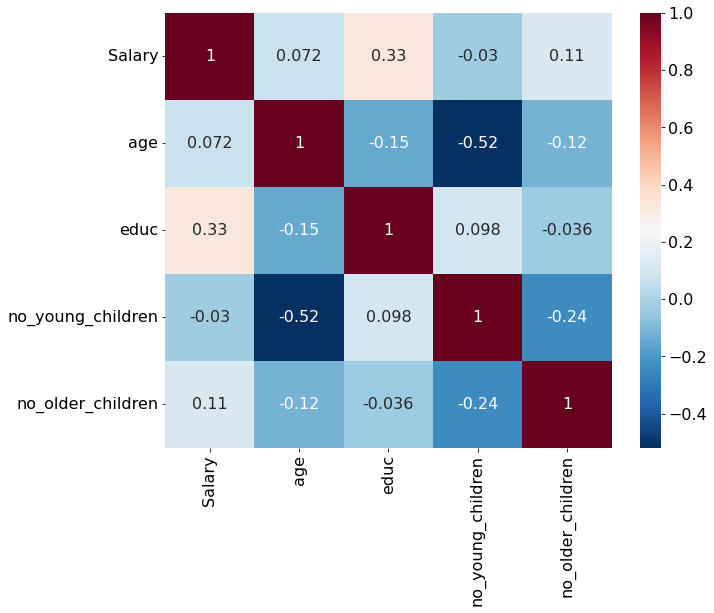

In [267]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='RdBu_r', annot=True)
plt.show()

### Checking Pairwise distribution of the variables

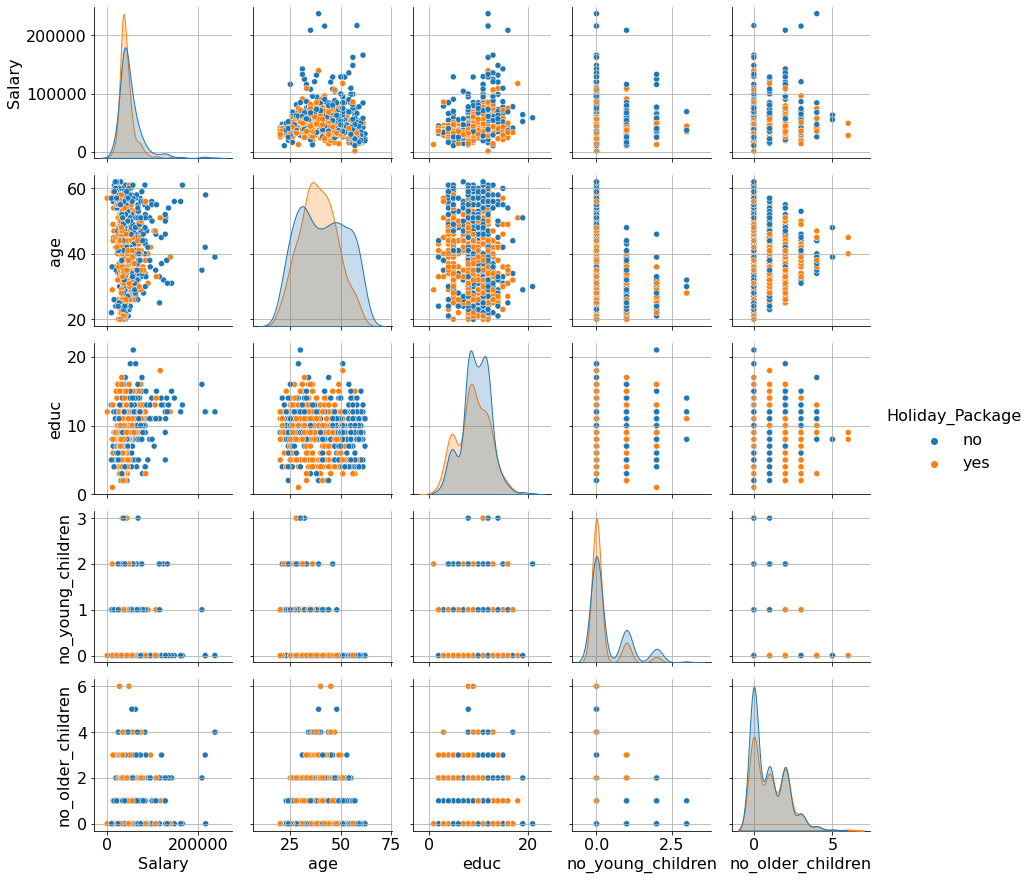

In [268]:
# Pairplot using sns
sns.pairplot(holiday_data ,diag_kind='kde' ,hue='Holiday_Package');

## 1.2 Build various iterations of the Logistic Regression model using appropriate variable selection techniques for the full data. Compare values of model selection criteria for proposed models. Compare as many criteria as you feel are suitable.

In [269]:
holiday_data.columns

Index(['Holiday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [270]:
# Converting Categorical to Numerical Variable
for feature in holiday_data.columns: 
    if holiday_data[feature].dtype == 'object':
        print("\n")
        print("feature:",feature)
        print(pd.Categorical(holiday_data[feature].unique()))
        print(pd.Categorical(holiday_data[feature].unique()).codes)
        
        holiday_data[feature] = pd.Categorical(holiday_data[feature]).codes 



feature: Holiday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [271]:
holiday_data.head()

Holiday_Package  Salary  age  educ  no_young_children  no_older_children  \
0                0   48412   30     8                  1                  1   
1                1   37207   45     8                  0                  1   
2                0   58022   46     9                  0                  0   
3                0   66503   31    11                  2                  0   
4                0   66734   44    12                  0                  2   

   foreign  
0        0  
1        0  
2        0  
3        0  
4        0

In [272]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holiday_Package    872 non-null    int8 
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int8 
dtypes: int64(5), int8(2)
memory usage: 35.9 KB


In [273]:
holiday_data.Holiday_Package.value_counts()

0    471
1    401
Name: Holiday_Package, dtype: int64

In [274]:
round(holiday_data.Holiday_Package.value_counts(1),2)

0    0.54
1    0.46
Name: Holiday_Package, dtype: float64

In [275]:
holiday_data.foreign.value_counts()

0    656
1    216
Name: foreign, dtype: int64

In [276]:
round(holiday_data.foreign.value_counts(1),2)

0    0.75
1    0.25
Name: foreign, dtype: float64

Among 872 Employees, 46% employees are taking holiday packages. The highest proportion of Employees are not Foreigner(75%), and rest (25%) are not.

In [277]:
#Model 1-All variables-Backward Selection

In [278]:
# LM_1 = sm.logit(formula='Holiday_Package~Salary+age+educ+no_young_children+no_older_children+foreign',
#                 data=holiday_data).fit()
# LM_1.summary()

In [279]:
# Value of Pseudo R-squ.:	0.1281
# p_value of educ is 0.181
# p_value of no_older_children 0.782
# Which is greater than significance level i.e. 0.05
# Hence, we will drop no_older_children and build another model. 
# Also lets check the VIF score of these variables

In [280]:
# coef=LM_1.params
# coef

In [281]:
# def adj_pseudo_r2(model_BS):
#     return 1 - (model_BS.llf-model_BS.df_model)/model_BS.llnull   

In [282]:
# model_name_BS = []
# model_perf_BS = []

# model_name_BS.append('All variable')
# model_perf_BS.append(adj_pseudo_r2(LM_1))
# adj_pseudo_r2(LM_1)

In [283]:
# Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF).

In [398]:
# model_odds = pd.DataFrame(np.exp(LM_1.params))
# model_odds


In [285]:
# def vif_cal(input_data):
#     x_vars=input_data
#     xvar_names=input_data.columns
#     for i in range(0,xvar_names.shape[0]):
#         y=x_vars[xvar_names[i]] 
#         x=x_vars[xvar_names.drop(xvar_names[i])]
#         rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
#         vif=round(1/(1-rsq),2)
#         print (xvar_names[i], " VIF = " , vif)

In [286]:
# vif_cal(input_data=holiday_data.drop('Holiday_Package',axis=1))

In [287]:
# Model 2-drop no_older_children

In [288]:
# LM_2 = sm.logit(formula='Holiday_Package~Salary+age+educ+no_young_children+foreign',data=holiday_data).fit()
# LM_2.summary()

In [289]:
# Pseudo R-squ.:	0.1281-no change if we compare with Model1
# p_value of educ	0.172 which is greater than level of significance.
# Hence next model3 we will buid after dropping this variable

In [290]:
# vif_cal(input_data=holiday_data.drop(['Holiday_Package','no_older_children'],axis=1))

In [291]:
# model_name_BS.append('All Variable w/o no_older_children ')
# model_perf_BS.append(adj_pseudo_r2(LM_2))
# adj_pseudo_r2(LM_2)

In [292]:
## Model 3-drop educ

In [293]:
# LM_3 = sm.logit(formula='Holiday_Package~Salary+age+no_young_children+foreign',data=holiday_data).fit()
# LM_3.summary()

In [294]:
# <!-- Pseudo R-squ.:	0.1265 a slight shift in the value
# p_value of all the variables are zero -->

In [295]:
# vif_cal(input_data=holiday_data.drop(['Holiday_Package','no_older_children','educ'],axis=1))

In [296]:
# model_name_BS.append('All Variable w/o no_older_children & educ ')
# model_perf_BS.append(adj_pseudo_r2(LM_3))
# adj_pseudo_r2(LM_3)

In [297]:
# print('McFadden Psuedo R Squared (Model 1: All Variable) =',round(LM_1.prsquared,2))
# print('McFadden Psuedo R Squared (Model 1: All Variable) =',round(LM_2.prsquared,2))
# print('McFadden Psuedo R Squared (Model 1: All Variable) =',round(LM_3.prsquared,2))

In [298]:
# models=[LM_1,LM_2,LM_3]
# model_names= {LM_1: 'Model 1: All variable',LM_2:'Model 2: w/o no_older_children',LM_3: 'Final Model-w/o educ'}
# for i in models:
#     ll_Intercept=i.llnull
#     ll_Model = i.llf
#     N= holiday_data.shape[0]
#     num=(1- np.exp((ll_Model - ll_Intercept)*(-2/N)))
#     den=( 1- np.exp((ll_Intercept)*(2/N)))
#     nagelkerke_r2 = num/den
#     print('Nagelkerke R Squared for {} ='.format(model_names[i]),round(nagelkerke_r2,2))


In [299]:
# model_eval_BS = pd.DataFrame({'model_name_BS': model_name_BS, 'model_perf_BS': model_perf_BS}, index=range(1,4))
# model_eval_BS

## Model 1 Forward Selection

In [300]:
LG_model_1 = sm.logit(formula = 'Holiday_Package~Salary', data=holiday_data).fit()
LG_model_1.summary()

Optimization terminated successfully.
         Current function value: 0.670170
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Holiday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      870
Method:                           MLE   Df Model:                            1
Date:                Thu, 03 Feb 2022   Pseudo R-squ.:                 0.02863
Time:                        23:18:53   Log-Likelihood:                -584.39
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 4.378e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7875      0.190      4.151      0.000       0.416       1.159
Salary     -2.035e-05    3.9e-06     -5.223      0.000    -2.8e-05   -1.27e-05
==============================================================================
"""

In [301]:
# def adj_pseudo_r2(model):
#     return 1 - (model.llf-model.df_model)/model.llnull   

In [302]:
# model_name = []
# model_perf = []

# model_name.append('Salary')
# model_perf.append(adj_pseudo_r2(LG_model_1))
# adj_pseudo_r2(LG_model_1)

- Building the first Model with one single variable i.e. 'Salary'. 
- Pseudo R-squ.:	0.02863 approx 0.03
- p_value of Salary is 0 which is less than level of significance.
- adj_pseudo_r2: 0.026967 approx 0.03

## Model 2

In [303]:
LG_model_2 = sm.logit(formula='Holiday_Package~Salary+age',data=holiday_data).fit()
LG_model_2.summary()

Optimization terminated successfully.
         Current function value: 0.666837
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Holiday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      869
Method:                           MLE   Df Model:                            2
Date:                Thu, 03 Feb 2022   Pseudo R-squ.:                 0.03346
Time:                        23:18:53   Log-Likelihood:                -581.48
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.811e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4070      0.322      4.364      0.000       0.775       2.039
Salary     -2.009e-05   3.93e-06     -5.112      0.000   -2.78e-05   -1.24e-05
age           -0.0159      0.007     -2.402      0.016      -0.029      -0.003
==============================================================================
"""

In [304]:
# model_name.append('Salary+age')
# model_perf.append(adj_pseudo_r2(LG_model_2))
# adj_pseudo_r2(LG_model_2)

- Building the 2nd Model with two single variable i.e. 'Salary+age'. 
- Pseudo R-squ.:	0.03346 approx 0.03
- p_value of Salary is 0 which is less than level of significance.
- p_value of age is 0.016 which is also less than level of significance.
- adj_pseudo_r2: 0.03013 approx 0.03

## Model 3

In [305]:
LG_model_3 = sm.logit(formula='Holiday_Package~Salary+age+educ',data=holiday_data).fit()
LG_model_3.summary()

Optimization terminated successfully.
         Current function value: 0.665337
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Holiday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      868
Method:                           MLE   Df Model:                            3
Date:                Thu, 03 Feb 2022   Pseudo R-squ.:                 0.03563
Time:                        23:18:54   Log-Likelihood:                -580.17
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 2.615e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7605      0.391      4.504      0.000       0.994       2.527
Salary     -1.795e-05    4.1e-06     -4.380      0.000    -2.6e-05   -9.92e-06
age           -0.0179      0.007     -2.655      0.008      -0.031      -0.005
educ          -0.0401      0.025     -1.614      0.107      -0.089       0.009
==============================================================================
"""

In [306]:
# model_name.append('Salary+age+educ')
# model_perf.append(adj_pseudo_r2(LG_model_3))
# adj_pseudo_r2(LG_model_3)

- Building the 2nd Model with two single variable i.e. 'Salary+age+educ'.
- Pseudo R-squ.: 0.03563 approx 0.04 ----- very slight change in the value.
- p_value of Salary is 0 which is less than level of significance.
- p_value of age is 0.008 which is also less than level of significance.
- p_value of educ is 0.107 which is higher than level of significance. 
- adj_pseudo_r2: 0.03064 approx 0.03

In [307]:
def vif_cal(input_data):
    '''
    input_data: Dataframe of features
    '''
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(len(xvar_names)):
        y = x_vars[xvar_names[i]] 
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif = round(1/(1-rsq), 2)
        print (xvar_names[i], " VIF = " , vif)

In [308]:
vif_cal(input_data=holiday_data[['Salary','age','educ']])

Salary  VIF =  1.14
age  VIF =  1.04
educ  VIF =  1.16


Here, we see that the value of VIF for the 'salary','age' and the 'educ' variable is not high at all.
Lets keep a threshold of 5 for VIF

## Model 4

In [309]:
LG_model_4 = sm.logit(formula='Holiday_Package~Salary+age+educ+no_young_children',data=holiday_data).fit()
LG_model_4.summary()

Optimization terminated successfully.
         Current function value: 0.628367
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Holiday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      867
Method:                           MLE   Df Model:                            4
Date:                Thu, 03 Feb 2022   Pseudo R-squ.:                 0.08922
Time:                        23:18:54   Log-Likelihood:                -547.94
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 2.672e-22
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.5795      0.479      7.474      0.000       2.641       4.518
Salary            -1.961e-05   4.31e-06     -4.545      0.000   -2.81e-05   -1.12e-05
age                  -0.0529      0.008     -6.296      0.000      -0.069      -0.036
educ                 -0.0399      0.026     -1.542      0.123      -0.091       0.011
no_young_children    -1.1904      0.164     -7.270      0.000      -1.511      -0.869
=====================================================================================
"""

In [310]:
# model_name.append('Salary+age+educ+no_young_children')
# model_perf.append(adj_pseudo_r2(LG_model_4))
# adj_pseudo_r2(LG_model_4)

In [311]:
vif_cal(input_data=holiday_data[['Salary','age','educ','no_young_children']])

Salary  VIF =  1.14
age  VIF =  1.4
educ  VIF =  1.16
no_young_children  VIF =  1.37


- Pseudo R-squ.:	0.08922 approx 0.09......increase in the value from earlier model
- adj_Pseudo R-squ.:	0.08257 approx 0.08  
- Which means no_young_children is a ignificant variable for the model.
- But the p_value of variable educ is high.Hence, we will drop the variable 'educ' and add another variable. This tells that the variable is not statistically significant for our prediction.
- All the VIF score are also under the threshold value

## Model 5

In [312]:
 LG_model_5 = sm.logit(formula='Holiday_Package~Salary+age+no_young_children+no_older_children',data=holiday_data).fit()
LG_model_5.summary()

Optimization terminated successfully.
         Current function value: 0.629735
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Holiday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      867
Method:                           MLE   Df Model:                            4
Date:                Thu, 03 Feb 2022   Pseudo R-squ.:                 0.08724
Time:                        23:18:54   Log-Likelihood:                -549.13
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 8.613e-22
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.2397      0.455      7.127      0.000       2.349       4.131
Salary            -2.171e-05   4.17e-06     -5.208      0.000   -2.99e-05   -1.35e-05
age                  -0.0511      0.009     -5.859      0.000      -0.068      -0.034
no_young_children    -1.1918      0.175     -6.828      0.000      -1.534      -0.850
no_older_children    -0.0040      0.072     -0.055      0.956      -0.145       0.137
=====================================================================================
"""

In [313]:
# model_name.append('Salary+age+no_young_children+no_older_children')
# model_perf.append(adj_pseudo_r2(LG_model_5))
# adj_pseudo_r2(LG_model_5)

In [314]:
vif_cal(input_data=holiday_data[['Salary','age','no_young_children','no_older_children']])

Salary  VIF =  1.02
age  VIF =  1.51
no_young_children  VIF =  1.57
no_older_children  VIF =  1.18


- Pseudo R-squ.:	0.08724 approx 0.09
- adj_Pseudo R-squ.:	0.08058 approx 0.08
- p_value of no_older_children is very high
- Hence will drop the variable and add another variable
- VIF values are also below threshold value showing no Multicollinearity issue in the model

## Model 6

In [315]:
LG_model_6 = sm.logit(formula='Holiday_Package~Salary+age+no_young_children+foreign',data=holiday_data).fit()
LG_model_6.summary()

Optimization terminated successfully.
         Current function value: 0.602653
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Holiday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      867
Method:                           MLE   Df Model:                            4
Date:                Thu, 03 Feb 2022   Pseudo R-squ.:                  0.1265
Time:                        23:18:54   Log-Likelihood:                -525.51
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 6.885e-32
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.6725      0.426      6.278      0.000       1.838       3.507
Salary            -1.664e-05   4.08e-06     -4.075      0.000   -2.46e-05   -8.64e-06
age                  -0.0495      0.008     -5.843      0.000      -0.066      -0.033
no_young_children    -1.2946      0.169     -7.669      0.000      -1.625      -0.964
foreign               1.2124      0.183      6.634      0.000       0.854       1.571
=====================================================================================
"""

In [316]:
# model_name.append('Salary+age+no_young_children+froeign')
# model_perf.append(adj_pseudo_r2(LG_model_6))
# adj_pseudo_r2(LG_model_6)

In [317]:
vif_cal(input_data=holiday_data[['Salary','age','no_young_children','foreign']])

Salary  VIF =  1.05
age  VIF =  1.38
no_young_children  VIF =  1.37
foreign  VIF =  1.05


- We notice that the adjusted pseudo R-squared values have increased significantly.
- All p values are below 0.05
- VIF values are below threshold

# Model Evaluation

In [318]:
# Calculate McFadden R-square
print('McFadden Psuedo R Squared (Model 1: Salary) =',round(LG_model_1.prsquared,2))
print('McFadden Psuedo R Squared (Model 2: Salary+age) =',round(LG_model_2.prsquared,2))
print('McFadden Psuedo R Squared (Model 3: Salary+age+educ) =',round(LG_model_3.prsquared,2))
print('McFadden Psuedo R Squared (Model 4: Salary+age+no_young_children) =',round(LG_model_4.prsquared,2))
print('McFadden Psuedo R Squared (Model 5: Salary+age+no_young_children+no_older_children) =',round(LG_model_5.prsquared,2))
print('McFadden Psuedo R Squared (Model 6: Salary+age+no_young_children+froeign) =',round(LG_model_6.prsquared,2))

McFadden Psuedo R Squared (Model 1: Salary) = 0.03
McFadden Psuedo R Squared (Model 2: Salary+age) = 0.03
McFadden Psuedo R Squared (Model 3: Salary+age+educ) = 0.04
McFadden Psuedo R Squared (Model 4: Salary+age+no_young_children) = 0.09
McFadden Psuedo R Squared (Model 5: Salary+age+no_young_children+no_older_children) = 0.09
McFadden Psuedo R Squared (Model 6: Salary+age+no_young_children+froeign) = 0.13


In [319]:
# Calculate Nagelkerke R-square
models=[LG_model_1,LG_model_2,LG_model_3,LG_model_4,LG_model_5,LG_model_6]
model_names= {LG_model_1: 'Model 1: only Salary',LG_model_2:'Model 2: Salary+age',LG_model_3: 'Model 3:Salary+age+educ',LG_model_4:'Model 4: Salary+age+no_young_children',LG_model_5:'Model 5: Salary+age+no_young_children+no_older_children',LG_model_6:'Final Model 6: Salary+age+no_young_children+froeign'}
for i in models:
 ll_Intercept=i.llnull
 ll_Model = i.llf
 N= holiday_data.shape[0]
 num=(1- np.exp((ll_Model - ll_Intercept)*(-2/N)))
 den=( 1- np.exp((ll_Intercept)*(2/N)))
 nagelkerke_r2 = num/den
 print('Nagelkerke R Squared for {} ='.format(model_names[i]),round
(nagelkerke_r2,2))

Nagelkerke R Squared for Model 1: only Salary = 0.05
Nagelkerke R Squared for Model 2: Salary+age = 0.06
Nagelkerke R Squared for Model 3:Salary+age+educ = 0.06
Nagelkerke R Squared for Model 4: Salary+age+no_young_children = 0.15
Nagelkerke R Squared for Model 5: Salary+age+no_young_children+no_older_children = 0.15
Nagelkerke R Squared for Final Model 6: Salary+age+no_young_children+froeign = 0.21


In [320]:
# model_eval = pd.DataFrame({'model_name': model_name, 'model_perf': model_perf}, index=range(1,7))
# model_eval

In [321]:
predicted_holiday_data=pd.DataFrame(LG_model_6.predict(holiday_data.drop('Holiday_Package',axis=1)),columns=['predicted_prob'])
def zero_one(x):
    threshold =0.50
    if x>threshold:
        return 1
    else: return 0
    
predicted_holiday_data['Label']=predicted_holiday_data.predicted_prob.apply(zero_one)
predicted_holiday_data['Holiday_Package'] = holiday_data.Holiday_Package
predicted_holiday_data.groupby(['Holiday_Package','Label']).count().unstack()


predicted_prob     
Label                        0    1
Holiday_Package                    
0                          353  118
1                          173  228

In [322]:
predicted_holiday_data=pd.DataFrame(LG_model_6.predict(holiday_data.drop('Holiday_Package',axis=1)),columns=['predicted_prob'])
def zero_one(x):
    threshold =0.35
    if x>threshold:
        return 1
    else: return 0
    
predicted_holiday_data['Label']=predicted_holiday_data.predicted_prob.apply(zero_one)
predicted_holiday_data['Holiday_Package'] = holiday_data.Holiday_Package
predicted_holiday_data.groupby(['Holiday_Package','Label']).count().unstack()

predicted_prob     
Label                        0    1
Holiday_Package                    
0                          216  255
1                           62  339

Area Under the Curve 0.7321


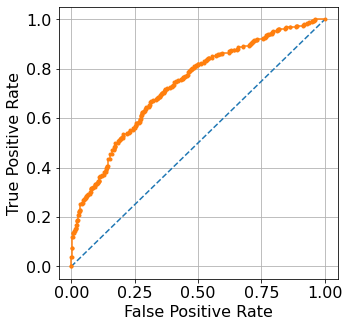

In [323]:
from sklearn import metrics
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(holiday_data.Holiday_Package,LG_model_6.predict(holiday_data.drop('Holiday_Package',axis=1)))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
print('Area Under the Curve', round(metrics.auc(fpr,tpr),4))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

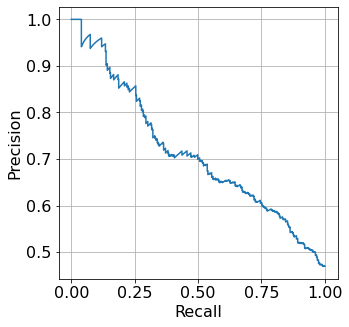

In [324]:
#precision recall curve
prec,recal,_=metrics.precision_recall_curve(holiday_data.Holiday_Package,LG_model_6.predict(holiday_data.drop('Holiday_Package',axis=1)))
plt.plot(recal, prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

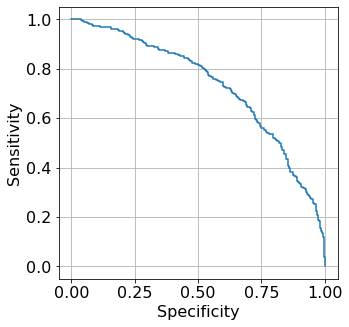

In [325]:
#Sensitivity vs Specificity Curve
Sensitivity = tpr
Specificity = 1 - fpr
plt.plot(Specificity,Sensitivity)
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.show()


In [326]:
# y_prob_pred_6 = LG_model_6.predict()
# y_prob_pred_6[-10:]# this score shows the probabolity of non defaulters
# # the score shows that there is 0.000 probability that customer will be non-defaulter hence they will default.

In [327]:
# y_prob_pred_6_default = 1 - y_prob_pred_6
# y_prob_pred_6_default[-10:]

## 1.3 Split the data into training (70%) and test (30%). Build the various iterations of the Logistic Regression models on the training data and use those models to predict on the test data using appropriate model evaluation metrics.

In [328]:
from sklearn.model_selection import train_test_split

In [329]:
Train,Test = train_test_split(holiday_data,test_size=0.3,random_state=1,stratify=holiday_data['Holiday_Package'])

In [330]:
Train.shape

(610, 7)

In [331]:
Test.shape

(262, 7)

In [332]:
print(Train['Holiday_Package'].value_counts(normalize=True),'\n')
print(Test['Holiday_Package'].value_counts(normalize=True))

0    0.539344
1    0.460656
Name: Holiday_Package, dtype: float64 

0    0.541985
1    0.458015
Name: Holiday_Package, dtype: float64


#### Note: We will use 'statsmodels' to perform the corresponding codes as well.

# Iteration 1 

In [333]:
from sklearn.preprocessing import LabelEncoder
Lr=LabelEncoder()
Train.Holiday_Package=Lr.fit_transform(Train.Holiday_Package)
Test.Holiday_Package=Lr.transform(Test.Holiday_Package)


In [334]:
Train.columns

Index(['Holiday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [335]:
formula='Holiday_Package~Salary+age+educ+no_young_children+no_older_children+foreign'

In [336]:
model1=sm.logit(formula,data=Train).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.598935
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        Holiday_Package   No. Observations:                  610
Model:                          Logit   Df Residuals:                      603
Method:                           MLE   Df Model:                            6
Date:                Thu, 03 Feb 2022   Pseudo R-squ.:                  0.1320
Time:                        23:18:55   Log-Likelihood:                -365.35
converged:                       True   LL-Null:                       -420.93
Covariance Type:            nonrobust   LLR p-value:                 1.166e-21
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.4624      0.654      3.767      0.000       1.181       3.744
Salary  

The predictors which are not significant at 5% level is educ & no_older_children. This is eliminated in the
next stage

In [337]:
formula='Holiday_Package~Salary+age+no_young_children+foreign'

In [338]:
model2=sm.logit(formula,data=Train).fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.601787
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        Holiday_Package   No. Observations:                  610
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            4
Date:                Thu, 03 Feb 2022   Pseudo R-squ.:                  0.1279
Time:                        23:18:55   Log-Likelihood:                -367.09
converged:                       True   LL-Null:                       -420.93
Covariance Type:            nonrobust   LLR p-value:                 2.276e-22
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.9301      0.500      5.865      0.000       1.951       3.909
Salary  

In [399]:
params = model2.params
conf = model2.conf_int()
conf['Coef']=np.round(model2.params.values,7)
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio', 'Coef']
conf[['5%', '95%', 'Odds Ratio']]=np.exp(conf[['5%', '95%', 'Odds Ratio']])
conf


5%        95%  Odds Ratio      Coef
Intercept          7.035222  49.860939   18.729196  2.930084
Salary             0.999977   0.999995    0.999986 -0.000014
age                0.924875   0.962924    0.943708 -0.057939
no_young_children  0.190307   0.398713    0.275459 -1.289315
foreign            1.984652   4.576034    3.013609  1.103138

In [340]:
# Train data-Evalution
predicted_on_Train = pd.DataFrame(model2.predict(Train.drop('Holiday_Package',axis=1)),columns=['predicted_prob'])
def zero_one(x):
    threshold =0.5
    if x>threshold:
        return 1
    else: return 0

print('Confusion Matrix on Train Set\n')

predicted_on_Train['Label']=predicted_on_Train.predicted_prob.apply(zero_one)
predicted_on_Train['Holiday_Package'] = Train.Holiday_Package
print(predicted_on_Train.groupby(['Holiday_Package','Label']).count().unstack())


Confusion Matrix on Train Set

                predicted_prob     
Label                        0    1
Holiday_Package                    
0                          242   87
1                          121  160


In [341]:
print('Classification Report on Train Set\n')
print(metrics.classification_report(predicted_on_Train.Holiday_Package,predicted_on_Train.Label))


Classification Report on Train Set

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.65      0.65       610
weighted avg       0.66      0.66      0.66       610



For Training Set
Area Under the Curve 0.7321


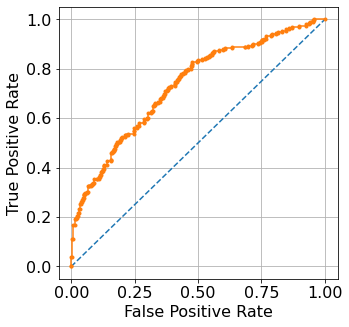

In [342]:
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Train.Holiday_Package,model2.predict(Train.drop('Holiday_Package',axis=1)))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
print('For Training Set')
print('Area Under the Curve', round(metrics.auc(fpr,tpr),4))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()


In [343]:
# Test Data-Evaluation
predicted_on_Test=pd.DataFrame(model2.predict(Test.drop('Holiday_Package',axis=1)),columns=['predicted_prob'])
def zero_one(x):
    threshold =0.5
    if x>threshold:
        return 1
    else: return 0
print('Confusion Matrix on Test Set\n')

predicted_on_Test['Label']=predicted_on_Test.predicted_prob.apply(zero_one)
predicted_on_Test['Holiday_Package'] = Test.Holiday_Package
print(predicted_on_Test.groupby(['Holiday_Package','Label']).count().unstack())

Confusion Matrix on Test Set

                predicted_prob    
Label                        0   1
Holiday_Package                   
0                          110  32
1                           53  67


In [344]:
print('Classification Report on Test Set\n')
print(metrics.classification_report(predicted_on_Test.Holiday_Package,predicted_on_Test.Label))


Classification Report on Test Set

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       142
           1       0.68      0.56      0.61       120

    accuracy                           0.68       262
   macro avg       0.68      0.67      0.67       262
weighted avg       0.68      0.68      0.67       262



For Test Set
Area Under the Curve 0.7205


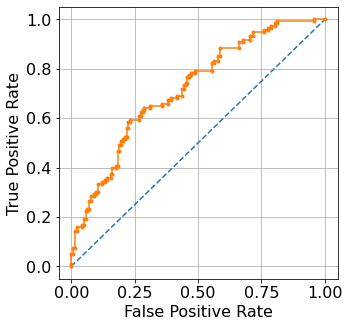

In [345]:
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test.Holiday_Package,model2.predict(Test.drop('Holiday_Package',axis=1)))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
print('For Test Set')
print('Area Under the Curve', round(metrics.auc(fpr,tpr),4))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()


# Iteration 2-Model Building

In [346]:
from sklearn.linear_model import LogisticRegression

In [347]:
LR = LogisticRegression(solver='newton-cg',penalty='none')

### Model 1-Building Model on the Training Data and checking the Accuracy score on the training data.

### We are taking predictors of Model 4 from above model built in question 1.2

In [348]:
model_1 = LR.fit(Train[['Salary', 'age','educ','no_young_children']],Train['Holiday_Package'])

In [349]:
print('Accuracy Score of Model 1:',model_1.score(Train[['Salary', 'age','educ','no_young_children']],Train['Holiday_Package']))

Accuracy Score of Model 1: 0.6475409836065574


This accuracy score is matching with our above tain accuracy score as well

### Model 1- Predicting the classes and the probabilities on the Test Data

In [350]:
model_1_test_class = model_1.predict(Test[['Salary', 'age','educ','no_young_children']])
model_1_test_probabilities = model_1.predict_proba(Test[['Salary', 'age','educ','no_young_children']])

### Model 2- Building the model on the Training Data and checking the Accuracy score on the training data.

### Building model on variables of model 5 in question 1.2

In [351]:
model_2 = LR.fit(Train[['Salary', 'age', 'no_young_children', 'no_older_children']],Train['Holiday_Package'])

In [352]:
print('Accuracy Score of Model 2:',model_2.score(Train[['Salary', 'age', 'no_young_children', 'no_older_children']],Train['Holiday_Package']))

Accuracy Score of Model 2: 0.6573770491803279


### Model 2 -BS- Predicting the classes and the probabilities on the Test Data

In [353]:
model_2_test_class = model_2.predict(Test[['Salary','age','no_young_children','no_older_children']])
model_2_test_probabilities = model_2.predict_proba(Test[['Salary','age','no_young_children','no_older_children']])

### Model 3- Building the model on the Training Data and checking the Accuracy score on the training data.

### Building model on variables of model 6 in question 1.2

In [354]:
model_3 = LR.fit(Train[[ 'Salary', 'age', 'no_young_children', 'foreign']],Train['Holiday_Package'])

In [355]:
print('Accuracy Score of Model 3:',model_2.score(Train[[ 'Salary', 'age', 'no_young_children', 'foreign']],Train['Holiday_Package']))

Accuracy Score of Model 3: 0.659016393442623


### Model 3-BS - Predicting the classes and the probabilities on the Test Data

In [356]:
model_3_test_class = model_3.predict(Test[[ 'Salary', 'age', 'no_young_children', 'foreign']])
model_3_test_probabilities = model_3.predict_proba(Test[[ 'Salary', 'age', 'no_young_children', 'foreign']])

## Evaluate the three models on the test data using the various statistics of the confusion matrix.

In [357]:
from sklearn import metrics

In [358]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

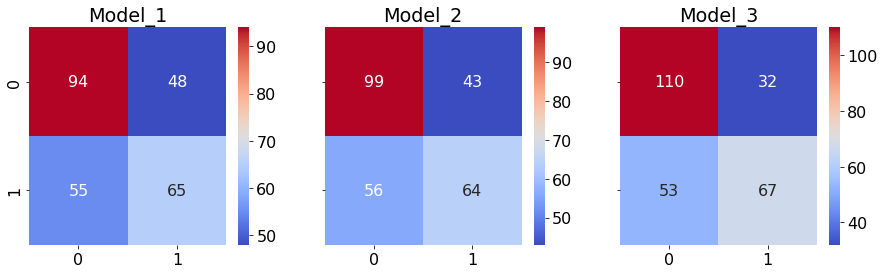

In [359]:
f,a =  plt.subplots(1,3,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['Holiday_Package'],model_1_test_class)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][0]);
a[0][0].set_title('Model_1')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Holiday_Package'],model_2_test_class)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Model_2');

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Holiday_Package'],model_3_test_class)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][2]);
a[0][2].set_title('Model_3');


In [360]:
print('Model 1')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Holiday_Package'],model_1_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Model 2')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Holiday_Package'],model_2_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Model 3')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Holiday_Package'],model_3_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

Model 1
True Negative: 94 
False Positives: 48 
False Negatives: 55 
True Positives: 65 


Model 2
True Negative: 99 
False Positives: 43 
False Negatives: 56 
True Positives: 64 


Model 3
True Negative: 110 
False Positives: 32 
False Negatives: 53 
True Positives: 67


In [361]:
print('Model 1')
print(metrics.classification_report(Test['Holiday_Package'],model_1_test_class),'\n')

print('Model 2')
print(metrics.classification_report(Test['Holiday_Package'],model_2_test_class),'\n')

print('Model 3')
print(metrics.classification_report(Test['Holiday_Package'],model_3_test_class))

Model 1
              precision    recall  f1-score   support

           0       0.63      0.66      0.65       142
           1       0.58      0.54      0.56       120

    accuracy                           0.61       262
   macro avg       0.60      0.60      0.60       262
weighted avg       0.61      0.61      0.61       262
 

Model 2
              precision    recall  f1-score   support

           0       0.64      0.70      0.67       142
           1       0.60      0.53      0.56       120

    accuracy                           0.62       262
   macro avg       0.62      0.62      0.62       262
weighted avg       0.62      0.62      0.62       262
 

Model 3
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       142
           1       0.68      0.56      0.61       120

    accuracy                           0.68       262
   macro avg       0.68      0.67      0.67       262
weighted avg       0.68      0.68      0.67   

## Check the summary statistics of the AUC-ROC curve for all the three Logistic Regression Models built. This is for the test data.

In [362]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

Model 1 AUC: 0.67142


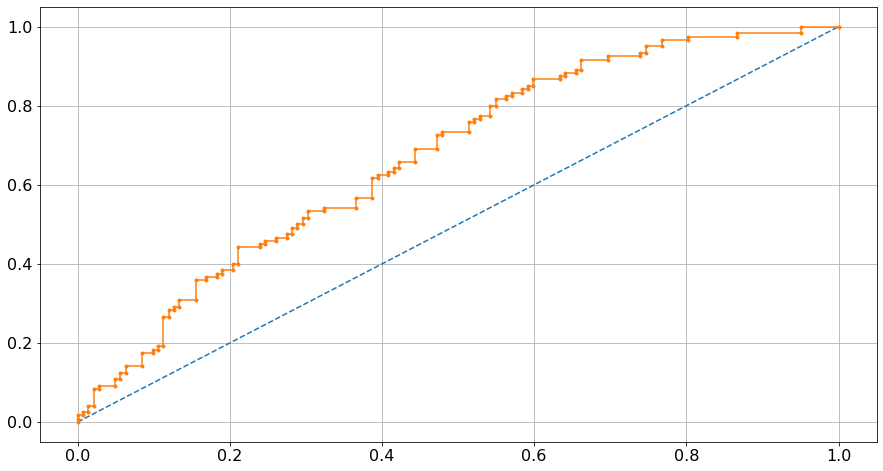

Model 2 AUC: 0.66485


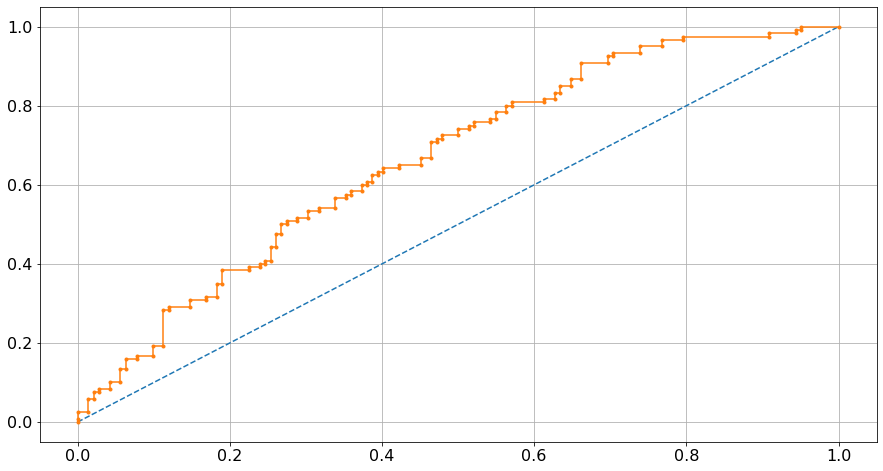

Model 3 AUC: 0.72054


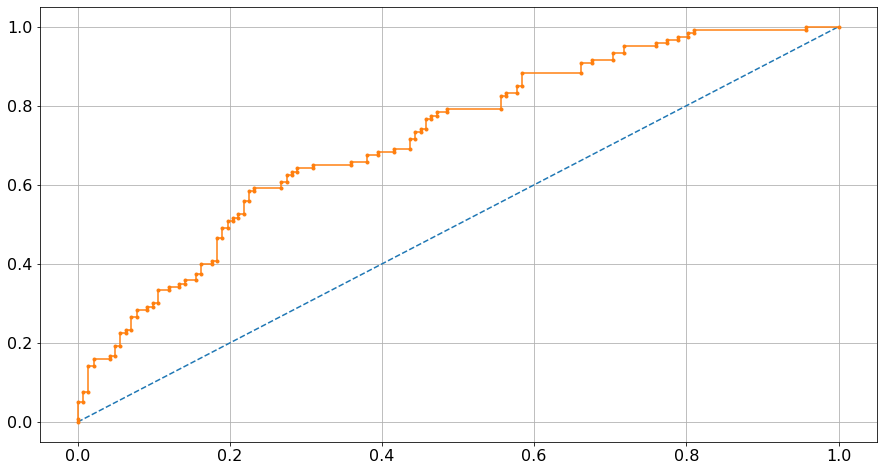

In [363]:
#code to spearatly plot the model

# AUC and ROC for the model 1


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Holiday_Package'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Holiday_Package'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for the model 2


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Holiday_Package'],model_2_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 2 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Holiday_Package'],model_2_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the model 3


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Holiday_Package'],model_3_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 3 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Holiday_Package'],model_3_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


In [364]:
from sklearn.metrics import roc_curve, roc_auc_score

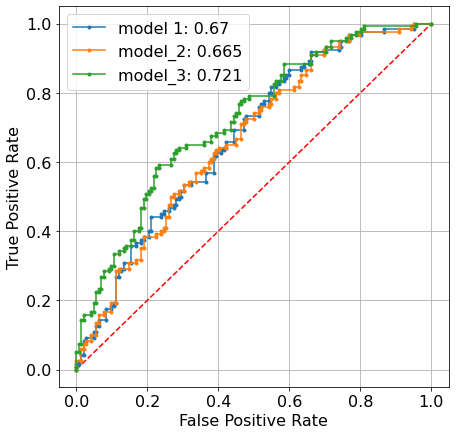

In [365]:
# code to plot the model in one plot
plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], linestyle='--', c = 'r') # Reference line

fpr1, tpr1, thresholds1 = metrics.roc_curve(Test['Holiday_Package'], model_1_test_probabilities[:,1]) # Model 3
auc = metrics.roc_auc_score(Test['Holiday_Package'], model_1_test_probabilities[:,1]) # getting AUC for the model
# plot the roc curve for the model
plt.plot(fpr1, tpr1, marker='.', label = 'model 1: %.2f'% auc)

fpr2, tpr2, thresholds2 = metrics.roc_curve(Test['Holiday_Package'], model_2_test_probabilities[:,1]) # Model 5
auc = metrics.roc_auc_score(Test['Holiday_Package'], model_2_test_probabilities[:,1]) # getting AUC for the model
plt.plot(fpr2, tpr2, marker='.', label = 'model_2: %.3f'% auc)

fpr3, tpr3, thresholds3 = metrics.roc_curve(Test['Holiday_Package'], model_3_test_probabilities[:,1]) # Model 6
auc = metrics.roc_auc_score(Test['Holiday_Package'], model_3_test_probabilities[:,1]) # getting AUC for the model
plt.plot(fpr3, tpr3, marker='.', label = 'model_3: %.3f'% auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [366]:
#--------------------------------Checking Model performace by performing outlier treatment-------------------------------#

# Model Building with outlier treatment-Not Recommended

In [367]:
#Building model with outlier treatment
HF_OT.head()

Holiday_Package  Salary  age  educ  no_young_children  no_older_children  \
0              no   48412   30     8                  1                  1   
1             yes   37207   45     8                  0                  1   
2              no   58022   46     9                  0                  0   
3              no   66503   31    11                  2                  0   
4              no   66734   44    12                  0                  2   

  foreign  
0      no  
1      no  
2      no  
3      no  
4      no

In [368]:
# Defining a function for getting the Upper and Lower limt acceptance of the outliers at 1.5*IQR. 
# We can choose to treat the outliers at 3*IQR as well

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [369]:
# This is a loop to treat outliers for all the non-'object' type varible

for column in HF_OT.columns:
    if HF_OT[column].dtype != 'object': 
        lr,ur=remove_outlier(HF_OT[column])
        HF_OT[column]=np.where(HF_OT[column]>ur,ur,HF_OT[column])
        HF_OT[column]=np.where(HF_OT[column]<lr,lr,HF_OT[column])

In [370]:
HF_OT.describe()

Salary         age        educ  no_young_children  \
count    872.000000  872.000000  872.000000              872.0   
mean   45608.336869   39.955275    9.302752                0.0   
std    15699.745151   10.551675    3.014712                0.0   
min     8105.750000   20.000000    2.000000                0.0   
25%    35324.000000   32.000000    8.000000                0.0   
50%    41903.500000   39.000000    9.000000                0.0   
75%    53469.500000   48.000000   12.000000                0.0   
max    80687.750000   62.000000   18.000000                0.0   

       no_older_children  
count         872.000000  
mean            0.980505  
std             1.077197  
min             0.000000  
25%             0.000000  
50%             1.000000  
75%             2.000000  
max             5.000000

In [371]:
#Lets convert the categorical column to numerical
# Converting Categorical to Numerical Variable
for feature in HF_OT.columns: 
    if HF_OT[feature].dtype == 'object':
        print("\n")
        print("feature:",feature)
        print(pd.Categorical(HF_OT[feature].unique()))
        print(pd.Categorical(HF_OT[feature].unique()).codes)
        
        HF_OT[feature] = pd.Categorical(HF_OT[feature]).codes 



feature: Holiday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [372]:
from sklearn.model_selection import train_test_split

In [373]:
Train1, Test1 = train_test_split(HF_OT, test_size=0.3, random_state=10, stratify = HF_OT['Holiday_Package'])

In [374]:
print(Train1['Holiday_Package'].value_counts(normalize=True),'\n')
print(Test1['Holiday_Package'].value_counts(normalize=True))

0    0.539344
1    0.460656
Name: Holiday_Package, dtype: float64 

0    0.541985
1    0.458015
Name: Holiday_Package, dtype: float64


In [375]:
from sklearn.linear_model import LogisticRegression

In [376]:
LR1 = LogisticRegression(solver='newton-cg',penalty='none')

In [377]:
model_OT1 = LR1.fit(Train1[['Salary', 'age', 'educ', 'no_young_children']],Train1['Holiday_Package'])

In [378]:
print('Accuracy Score of Model 1:',model_OT1.score(Train1[['Salary', 'age', 'educ', 'no_young_children']],Train1['Holiday_Package']))

Accuracy Score of Model 1: 0.5672131147540984


In [379]:
model_OT1_test_class = model_OT1.predict(Test1[['Salary', 'age', 'educ', 'no_young_children']])
model_OT1_test_probabilities = model_OT1.predict_proba(Test1[['Salary', 'age', 'educ', 'no_young_children']])

In [380]:
model_OT2 = LR1.fit(Train1[['Salary', 'age', 'no_young_children', 'no_older_children']],Train1['Holiday_Package'])

In [381]:
print('Accuracy Score of Model 2:',model_OT2.score(Train1[['Salary', 'age', 'no_young_children', 'no_older_children']],Train1['Holiday_Package']))

Accuracy Score of Model 2: 0.5737704918032787


In [382]:
model_OT2_test_class = model_OT2.predict(Test1[['Salary', 'age', 'no_young_children', 'no_older_children']])
model_OT2_test_probabilities = model_OT2.predict_proba(Test1[['Salary', 'age', 'no_young_children', 'no_older_children']])

In [383]:
model_OT3 = LR1.fit(Train1[['Salary', 'age', 'no_young_children', 'foreign']],Train1['Holiday_Package'])

In [384]:
print('Accuracy Score of Model 3:',model_OT2.score(Train1[['Salary', 'age', 'no_young_children', 'foreign']],Train1['Holiday_Package']))

Accuracy Score of Model 3: 0.6131147540983607


In [385]:
model_OT3_test_class = model_OT3.predict(Test1[['Salary', 'age', 'no_young_children', 'foreign']])
model_OT3_test_probabilities = model_OT3.predict_proba(Test1[['Salary', 'age', 'no_young_children', 'foreign']])

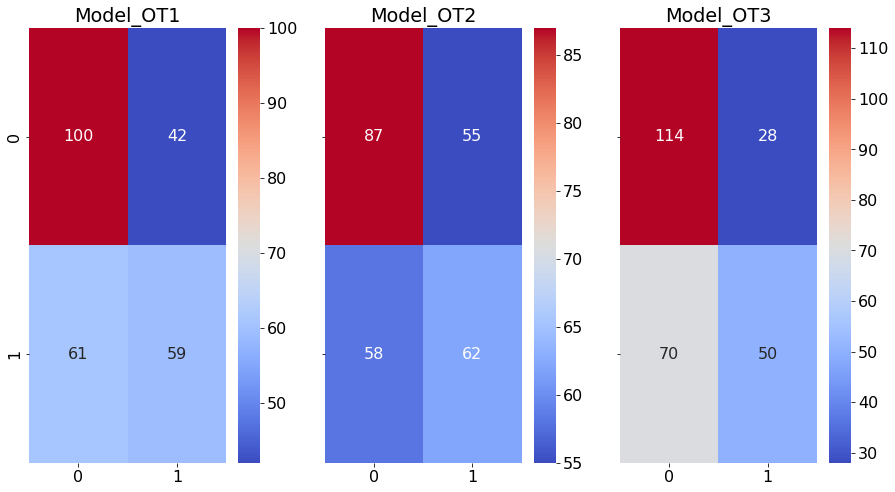

In [386]:
f,a =  plt.subplots(1,3,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test1['Holiday_Package'],model_OT1_test_class)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][0]);
a[0][0].set_title('Model_OT1')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test1['Holiday_Package'],model_OT2_test_class)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Model_OT2');

plot_1 = sns.heatmap((metrics.confusion_matrix(Test1['Holiday_Package'],model_OT3_test_class)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][2]);
a[0][2].set_title('Model_OT3');


In [387]:
print('OT Model 1')
tn, fp, fn, tp = metrics.confusion_matrix(Test1['Holiday_Package'],model_OT1_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('OT Model 2')
tn, fp, fn, tp = metrics.confusion_matrix(Test1['Holiday_Package'],model_OT2_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('OT Model 3')
tn, fp, fn, tp = metrics.confusion_matrix(Test1['Holiday_Package'],model_OT3_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

OT Model 1
True Negative: 100 
False Positives: 42 
False Negatives: 61 
True Positives: 59 


OT Model 2
True Negative: 87 
False Positives: 55 
False Negatives: 58 
True Positives: 62 


OT Model 3
True Negative: 114 
False Positives: 28 
False Negatives: 70 
True Positives: 50


In [388]:
print('OT Model 1')
print(metrics.classification_report(Test1['Holiday_Package'],model_OT1_test_class),'\n')

print('OT Model 2')
print(metrics.classification_report(Test1['Holiday_Package'],model_OT2_test_class),'\n')

print('OT Model 3')
print(metrics.classification_report(Test1['Holiday_Package'],model_OT3_test_class))

OT Model 1
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       142
           1       0.58      0.49      0.53       120

    accuracy                           0.61       262
   macro avg       0.60      0.60      0.60       262
weighted avg       0.60      0.61      0.60       262
 

OT Model 2
              precision    recall  f1-score   support

           0       0.60      0.61      0.61       142
           1       0.53      0.52      0.52       120

    accuracy                           0.57       262
   macro avg       0.56      0.56      0.56       262
weighted avg       0.57      0.57      0.57       262
 

OT Model 3
              precision    recall  f1-score   support

           0       0.62      0.80      0.70       142
           1       0.64      0.42      0.51       120

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.60       262
weighted avg       0.63      0.63    

In [389]:
from sklearn.metrics import roc_curve, roc_auc_score

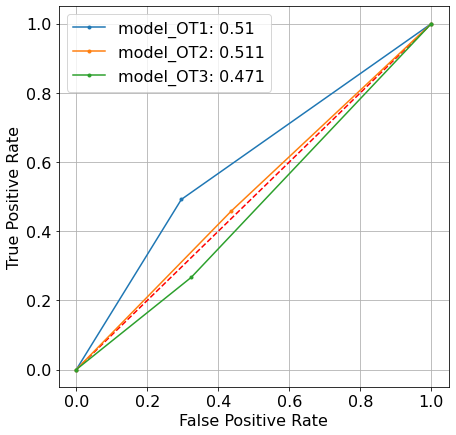

In [390]:
plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], linestyle='--', c = 'r') # Reference line

fpr3, tpr3, thresholds3 = roc_curve(Test1['Holiday_Package'], model_OT1_test_class) # Model 3
auc = roc_auc_score(Test['Holiday_Package'], model_OT1_test_class) # getting AUC for the model
# plot the roc curve for the model
plt.plot(fpr3, tpr3, marker='.', label = 'model_OT1: %.2f'% auc)

fpr5, tpr5, thresholds5 = roc_curve(Test['Holiday_Package'], model_OT2_test_class) # Model 5
auc = roc_auc_score(Test['Holiday_Package'], model_OT2_test_class) # getting AUC for the model
plt.plot(fpr5, tpr5, marker='.', label = 'model_OT2: %.3f'% auc)

fpr6, tpr6, thresholds6 = roc_curve(Test['Holiday_Package'], model_OT3_test_class) # Model 6
auc = roc_auc_score(Test['Holiday_Package'], model_OT3_test_class) # getting AUC for the model
plt.plot(fpr6, tpr6, marker='.', label = 'model_OT3: %.3f'% auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Model building with Hyper Parameters

In [391]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

df1=holiday_data.copy()
X = df1.drop('Holiday_Package',axis=1)
y = df1.Holiday_Package

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)
tuned_parameters = {'C':[0.1, 0.5, 1, 5, 10, 50, 100]}
clf = GridSearchCV(LogisticRegression(solver='liblinear'),tuned_parameters, cv=3, scoring ="accuracy")
clf.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100]},
             scoring='accuracy')

In [392]:
# Fit the logistic Regression Model
model = LogisticRegression(solver='newton-cg', max_iter=10000, penalty='l2',verbose=True,n_jobs=-1)
model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.8s finished


LogisticRegression(max_iter=10000, n_jobs=-1, solver='newton-cg', verbose=True)

In [393]:
ytrain_predict = model.predict(X_train)
ytest_predict=model.predict(X_test)

In [394]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.753599  0.246401
1  0.287308  0.712692
2  0.888743  0.111257
3  0.974783  0.025217
4  0.499096  0.500904

In [395]:
#Accuracy of Train Data
model.score(X_train, y_train)

0.680327868852459

AUC score is :0.471


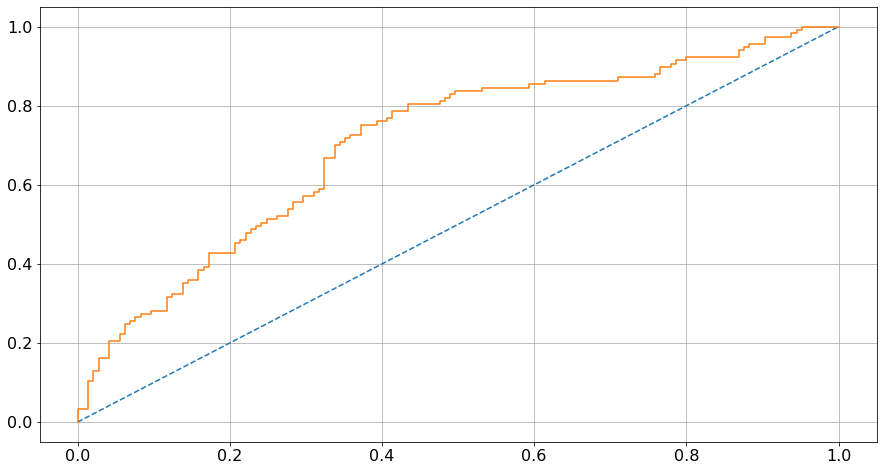

In [396]:
#Test model roc auc score
#predict probabilities
probs=model.predict_proba(X_test)
#Keeping probabilities for positive outcomes only
probs=probs[:,1]
#Calculating AUC score
test_auc=roc_auc_score(y_test,probs)
print('AUC score is :%.3f'% auc)
# plot roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)
